# Validación Técnica - Proyecto Individual | MLOps

# Francisco José Arellano Montes

### Analizar y comprender el data set proporcionado a través de un Análisis Exploratorio de Datos

In [1]:
!pip install ucimlrepo

instalación de librerías

In [2]:
import pandas
import numpy as np
from ucimlrepo import fetch_ucirepo

In [3]:
import seaborn as sns                       #visualization
import matplotlib.pyplot as plt             #visualization
%matplotlib inline

In [4]:
from sklearn import preprocessing

De esta manera podremos obtener el set de datos, lo dividiremos en features y targets y podremos ver más información de manera general observando su metadata y sus datos.

In [5]:
# fetch dataset
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938)

# data (as pandas dataframes)
Features = regensburg_pediatric_appendicitis.data.features
Targets = regensburg_pediatric_appendicitis.data.targets

# metadata
print(regensburg_pediatric_appendicitis.metadata)

# variable information
print(regensburg_pediatric_appendicitis.variables)


{'uci_id': 938, 'name': 'Regensburg Pediatric Appendicitis', 'repository_url': 'https://archive.ics.uci.edu/dataset/938/regensburg+pediatric+appendicitis', 'data_url': 'https://archive.ics.uci.edu/static/public/938/data.csv', 'abstract': 'This repository holds the data from a cohort of pediatric patients with suspected appendicitis admitted with abdominal pain to Children’s Hospital St. Hedwig in Regensburg, Germany, between 2016 and 2021. Each patient has (potentially multiple) ultrasound (US) images, aka views, tabular data comprising laboratory, physical examination, scoring results and ultrasonographic findings extracted manually by the experts, and three target variables, namely, diagnosis, management and severity.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Image'], 'num_instances': 782, 'num_features': 53, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': ['Age', 'Sex'], 'target_col': ['Management', 'Severity',

Tamaño que tienen ambos sets de datos, podemos observar que tenemos 53 features y tenemos 3 salidas o targets.

In [6]:
Features.shape

(782, 53)

In [7]:
Targets.shape

(782, 3)

Mostramos los 10 primeros datos del set de features

In [8]:
Features.head(10)

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,Appendix_Diameter,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,4.0,3.0,yes,7.1,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,5.0,4.0,no,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,5.0,3.0,no,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,7.0,6.0,no,NaN,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,5.0,6.0,yes,7.0,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
5,11.05,30.7,male,121.0,45.0,3.0,6.0,7.0,no,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,8.98,19.4,female,140.0,38.5,3.0,5.0,6.0,no,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7.06,NaN,female,NaN,21.5,2.0,3.0,3.0,no,NaN,...,NaN,yes,re UB,no,NaN,NaN,NaN,NaN,NaN,NaN
8,7.90,15.7,male,131.0,26.7,3.0,7.0,6.0,yes,3.7,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
9,14.34,14.9,male,174.0,45.5,3.0,4.0,4.0,yes,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Mostramos los 10 primeros datos del set de targets

In [9]:
Targets.head(10)

,Management,Severity,Diagnosis
0,conservative,uncomplicated,appendicitis
1,conservative,uncomplicated,no appendicitis
2,conservative,uncomplicated,no appendicitis
3,conservative,uncomplicated,no appendicitis
4,conservative,uncomplicated,appendicitis
5,conservative,uncomplicated,no appendicitis
6,conservative,uncomplicated,no appendicitis
7,conservative,uncomplicated,no appendicitis
8,conservative,uncomplicated,no appendicitis
9,conservative,uncomplicated,appendicitis


Análisis de los tipos de datos

Ahora podremos observar de esta manera los tipos de datos que tiene nuestro set de datos


In [10]:
Features.dtypes

Age                                 float64
BMI                                 float64
Sex                                  object
Height                              float64
Weight                              float64
Length_of_Stay                      float64
Alvarado_Score                      float64
Paedriatic_Appendicitis_Score       float64
Appendix_on_US                       object
Appendix_Diameter                   float64
Migratory_Pain                       object
Lower_Right_Abd_Pain                 object
Contralateral_Rebound_Tenderness     object
Coughing_Pain                        object
Nausea                               object
Loss_of_Appetite                     object
Body_Temperature                    float64
WBC_Count                           float64
Neutrophil_Percentage               float64
Segmented_Neutrophils               float64
Neutrophilia                         object
RBC_Count                           float64
Hemoglobin                      

In [11]:
Targets.dtypes

Management    object
Severity      object
Diagnosis     object
dtype: object

Si observamos de donde provienen los datos y las referencias existentes en las paginas de referencia parece que si concuerdan los tipos de datos, por ello no se hará ningún tipo de cambio.

Valores nulos

Ahora estaremos buscando si existen valores nulos y cuantos de ello están en el dataset

In [12]:
Features.isnull().sum()

Age                                   1
BMI                                  27
Sex                                   2
Height                               26
Weight                                3
Length_of_Stay                        4
Alvarado_Score                       52
Paedriatic_Appendicitis_Score        52
Appendix_on_US                        5
Appendix_Diameter                   284
Migratory_Pain                        9
Lower_Right_Abd_Pain                  8
Contralateral_Rebound_Tenderness     15
Coughing_Pain                        16
Nausea                                8
Loss_of_Appetite                     10
Body_Temperature                      7
WBC_Count                             6
Neutrophil_Percentage               103
Segmented_Neutrophils               728
Neutrophilia                         50
RBC_Count                            18
Hemoglobin                           18
RDW                                  26
Thrombocyte_Count                    18


In [13]:
Targets.isnull().sum()

Management    1
Severity      1
Diagnosis     2
dtype: int64

Como podemos observar hay bastantes valores nulos, estaremos quitando las columnas que tengan mas del 20% de valores nulos, los guardaremos en una lista y los quitaremos del set de datos.

In [14]:
values_to_drop = []
percent_missing = Features.isnull().sum() * 100 / len(Features)
for v in percent_missing.keys():

  if percent_missing[v] > 20:

    values_to_drop.append(v)
    print(f"{v}: {percent_missing[v]}")

Appendix_Diameter: 36.31713554987212
Segmented_Neutrophils: 93.09462915601023
Ketones_in_Urine: 25.575447570332482
RBC_in_Urine: 26.342710997442456
WBC_in_Urine: 25.44757033248082
Ipsilateral_Rebound_Tenderness: 20.843989769820972
Appendix_Wall_Layers: 72.1227621483376
Target_Sign: 82.3529411764706
Appendicolith: 91.17647058823529
Perfusion: 91.94373401534527
Perforation: 89.64194373401534
Surrounding_Tissue_Reaction: 67.77493606138107
Appendicular_Abscess: 89.1304347826087
Abscess_Location: 98.33759590792839
Pathological_Lymph_Nodes: 74.04092071611254
Lymph_Nodes_Location: 84.52685421994885
Bowel_Wall_Thickening: 87.34015345268543
Conglomerate_of_Bowel_Loops: 94.50127877237851
Ileus: 92.32736572890026
Coprostasis: 90.92071611253196
Meteorism: 82.09718670076727
Enteritis: 91.56010230179028
Gynecological_Findings: 96.67519181585678


In [15]:
values_to_drop

['Appendix_Diameter',
 'Segmented_Neutrophils',
 'Ketones_in_Urine',
 'RBC_in_Urine',
 'WBC_in_Urine',
 'Ipsilateral_Rebound_Tenderness',
 'Appendix_Wall_Layers',
 'Target_Sign',
 'Appendicolith',
 'Perfusion',
 'Perforation',
 'Surrounding_Tissue_Reaction',
 'Appendicular_Abscess',
 'Abscess_Location',
 'Pathological_Lymph_Nodes',
 'Lymph_Nodes_Location',
 'Bowel_Wall_Thickening',
 'Conglomerate_of_Bowel_Loops',
 'Ileus',
 'Coprostasis',
 'Meteorism',
 'Enteritis',
 'Gynecological_Findings']

Este será el set de datos que estaremos usando, la mayoría de los datos eliminados fueron categóricos y facilitara el uso del dataset ya que contine muchos features, el resto de los datos los estaremos imputando nosotros mismos.

In [16]:
features_reduced_data = Features.copy()
features_reduced_data = Features.drop(columns =values_to_drop)
features_reduced_data

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,Migratory_Pain,...,Hemoglobin,RDW,Thrombocyte_Count,CRP,Dysuria,Stool,Peritonitis,Psoas_Sign,US_Performed,Free_Fluids
0,12.68,16.90,female,148.0,37.0,3.0,4.0,3.0,yes,no,...,14.8,12.2,254.0,0.0,no,normal,no,yes,yes,no
1,14.10,31.90,male,147.0,69.5,2.0,5.0,4.0,no,yes,...,15.7,12.7,151.0,3.0,yes,normal,no,yes,yes,no
2,14.14,23.30,female,163.0,62.0,4.0,5.0,3.0,no,no,...,11.4,12.2,300.0,3.0,no,constipation,no,yes,yes,no
3,16.37,20.60,female,165.0,56.0,3.0,7.0,6.0,no,yes,...,13.6,13.2,258.0,0.0,yes,normal,no,yes,yes,no
4,11.08,16.90,female,163.0,45.0,3.0,5.0,6.0,yes,no,...,12.6,13.6,311.0,0.0,no,constipation,no,yes,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,12.41,25.25,female,166.5,70.0,4.0,8.0,7.0,yes,yes,...,13.7,13.4,243.0,71.0,no,diarrhea,local,yes,yes,no
778,17.09,20.43,female,158.0,51.0,6.0,5.0,3.0,no,no,...,13.1,12.8,310.0,245.0,no,normal,local,no,yes,no
779,14.99,19.91,female,152.0,46.0,4.0,5.0,3.0,no,no,...,12.7,12.8,328.0,2.0,yes,normal,no,no,yes,yes
780,7.20,14.30,male,129.3,23.9,5.0,9.0,8.0,yes,yes,...,14.3,12.7,345.0,8.0,no,normal,local,no,yes,yes


In [17]:
targets_reduced_data = Targets.copy()
targets_reduced_data

,Management,Severity,Diagnosis
0,conservative,uncomplicated,appendicitis
1,conservative,uncomplicated,no appendicitis
2,conservative,uncomplicated,no appendicitis
3,conservative,uncomplicated,no appendicitis
4,conservative,uncomplicated,appendicitis
...,...,...,...
777,primary surgical,uncomplicated,appendicitis
778,secondary surgical,complicated,appendicitis
779,primary surgical,uncomplicated,appendicitis
780,primary surgical,uncomplicated,appendicitis


Separación de tipos de datos

Ahora para el set de datos de features, estaremos separando los tipos de datos categóricos y numéricos, no solo será más fácil el imputarlos, pero también será más fácil poder ver analizar ambos datos, sin mencionar que así evitaremos mezclar ambos datos.


In [18]:
numerical_features = features_reduced_data.select_dtypes(include='number')
categorical_features = features_reduced_data.select_dtypes(exclude='number')

In [19]:
numerical_features

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Body_Temperature,WBC_Count,Neutrophil_Percentage,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,CRP
0,12.68,16.90,148.0,37.0,3.0,4.0,3.0,37.0,7.7,68.2,5.27,14.8,12.2,254.0,0.0
1,14.10,31.90,147.0,69.5,2.0,5.0,4.0,36.9,8.1,64.8,5.26,15.7,12.7,151.0,3.0
2,14.14,23.30,163.0,62.0,4.0,5.0,3.0,36.6,13.2,74.8,3.98,11.4,12.2,300.0,3.0
3,16.37,20.60,165.0,56.0,3.0,7.0,6.0,36.0,11.4,63.0,4.64,13.6,13.2,258.0,0.0
4,11.08,16.90,163.0,45.0,3.0,5.0,6.0,36.9,8.1,44.0,4.44,12.6,13.6,311.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,12.41,25.25,166.5,70.0,4.0,8.0,7.0,39.4,11.4,76.6,4.95,13.7,13.4,243.0,71.0
778,17.09,20.43,158.0,51.0,6.0,5.0,3.0,37.8,17.4,89.2,4.52,13.1,12.8,310.0,245.0
779,14.99,19.91,152.0,46.0,4.0,5.0,3.0,37.3,14.6,68.5,4.49,12.7,12.8,328.0,2.0
780,7.20,14.30,129.3,23.9,5.0,9.0,8.0,37.5,17.8,77.0,4.97,14.3,12.7,345.0,8.0


In [20]:
categorical_features

,Sex,Appendix_on_US,Migratory_Pain,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Coughing_Pain,Nausea,Loss_of_Appetite,Neutrophilia,Dysuria,Stool,Peritonitis,Psoas_Sign,US_Performed,Free_Fluids
0,female,yes,no,yes,yes,no,no,yes,no,no,normal,no,yes,yes,no
1,male,no,yes,yes,yes,no,no,yes,no,yes,normal,no,yes,yes,no
2,female,no,no,yes,yes,no,no,no,no,no,constipation,no,yes,yes,no
3,female,no,yes,yes,no,no,yes,yes,no,yes,normal,no,yes,yes,no
4,female,yes,no,yes,yes,yes,yes,yes,no,no,constipation,no,yes,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,female,yes,yes,yes,no,no,no,yes,yes,no,diarrhea,local,yes,yes,no
778,female,no,no,no,no,no,no,yes,yes,no,normal,local,no,yes,no
779,female,no,no,yes,no,no,no,no,no,yes,normal,no,no,yes,yes
780,male,yes,yes,yes,no,yes,yes,no,yes,no,normal,local,no,yes,yes


Ahora se imputarán los datos tanto de los datos categóricos, numéricos y los pocos que tenemos faltantes de nuestros targets

Valores numéricos

In [21]:
features_reduced_data.describe()

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Body_Temperature,WBC_Count,Neutrophil_Percentage,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,CRP
count,781.000000,755.000000,756.000000,779.000000,778.000000,730.000000,730.000000,775.000000,776.000000,679.000000,764.000000,764.000000,756.000000,764.000000,771.000000
mean,11.346451,18.907012,148.017460,43.172542,4.284062,5.921918,5.253425,37.404516,12.670683,71.791163,4.799490,13.380497,13.180291,285.252618,31.386900
std,3.529909,4.385331,19.732016,17.390984,2.574057,2.155972,1.958456,0.903678,5.366525,14.463656,0.499012,1.393271,4.538774,72.494373,57.433854
min,0.000000,7.830000,53.000000,3.960000,1.000000,0.000000,0.000000,26.900000,2.600000,27.200000,3.620000,8.200000,11.200000,91.000000,0.000000
25%,9.200000,15.725000,137.000000,29.500000,3.000000,4.000000,4.000000,36.800000,8.200000,61.400000,4.537500,12.600000,12.300000,236.000000,1.000000
50%,11.440000,18.060000,149.650000,41.400000,3.000000,6.000000,5.000000,37.200000,12.000000,75.500000,4.780000,13.300000,12.700000,276.000000,7.000000
75%,14.100000,21.180000,163.000000,54.000000,5.000000,8.000000,7.000000,37.900000,16.200000,83.600000,5.020000,14.000000,13.300000,330.000000,33.000000
max,18.360000,38.160000,192.000000,103.000000,28.000000,10.000000,10.000000,40.200000,37.700000,97.700000,14.000000,36.000000,86.900000,708.000000,365.000000


In [22]:
numerical_features["Age"].fillna(numerical_features["Age"].median(), inplace = True)
numerical_features["BMI"].fillna(numerical_features["BMI"].mean(), inplace = True)
numerical_features["Height"].fillna(numerical_features["Height"].mean(), inplace = True)
numerical_features["Weight"].fillna(numerical_features["Weight"].mean(), inplace = True)
numerical_features["Length_of_Stay"].fillna(numerical_features["Length_of_Stay"].mean(), inplace = True)
numerical_features["Alvarado_Score"].fillna(numerical_features["Alvarado_Score"].mean(), inplace = True)
numerical_features["Paedriatic_Appendicitis_Score"].fillna(numerical_features["Paedriatic_Appendicitis_Score"].mean(), inplace = True)
numerical_features["Body_Temperature"].fillna(numerical_features["Body_Temperature"].mean(), inplace = True)
numerical_features["WBC_Count"].fillna(numerical_features["WBC_Count"].mean(), inplace = True)
numerical_features["Neutrophil_Percentage"].fillna(numerical_features["Neutrophil_Percentage"].mean(), inplace = True)
numerical_features["RBC_Count"].fillna(numerical_features["RBC_Count"].mean(), inplace = True)
numerical_features["Hemoglobin"].fillna(numerical_features["Hemoglobin"].mean(), inplace = True)
numerical_features["RDW"].fillna(numerical_features["RDW"].mean(), inplace = True)
numerical_features["Thrombocyte_Count"].fillna(numerical_features["Thrombocyte_Count"].mean(), inplace = True)
numerical_features["CRP"].fillna(numerical_features["CRP"].mean(), inplace = True)

Para estos valores, se usó la mayoría los valores de la media, ya que no parecen salirse bastante del resto de los datos que tenemos en el dataframe

Valores categóricos

In [23]:
categorical_features["Sex"].fillna(categorical_features["Sex"].value_counts().index[0], inplace = True)
categorical_features["Appendix_on_US"].fillna(categorical_features["Appendix_on_US"].value_counts().index[0], inplace = True)
categorical_features["Migratory_Pain"].fillna(categorical_features["Migratory_Pain"].value_counts().index[0], inplace = True)
categorical_features["Lower_Right_Abd_Pain"].fillna(categorical_features["Lower_Right_Abd_Pain"].value_counts().index[0], inplace = True)
categorical_features["Contralateral_Rebound_Tenderness"].fillna(categorical_features["Contralateral_Rebound_Tenderness"].value_counts().index[0], inplace = True)
categorical_features["Coughing_Pain"].fillna(categorical_features["Coughing_Pain"].value_counts().index[0], inplace = True)
categorical_features["Nausea"].fillna(categorical_features["Nausea"].value_counts().index[0], inplace = True)
categorical_features["Loss_of_Appetite"].fillna(categorical_features["Loss_of_Appetite"].value_counts().index[0], inplace = True)
categorical_features["Neutrophilia"].fillna(categorical_features["Neutrophilia"].value_counts().index[0], inplace = True)
categorical_features["Dysuria"].fillna(categorical_features["Dysuria"].value_counts().index[0], inplace = True)
categorical_features["Stool"].fillna(categorical_features["Stool"].value_counts().index[0], inplace = True)
categorical_features["Peritonitis"].fillna(categorical_features["Peritonitis"].value_counts().index[0], inplace = True)
categorical_features["Psoas_Sign"].fillna(categorical_features["Psoas_Sign"].value_counts().index[0], inplace = True)
categorical_features["US_Performed"].fillna(categorical_features["US_Performed"].value_counts().index[0], inplace = True)
categorical_features["Free_Fluids"].fillna(categorical_features["Free_Fluids"].value_counts().index[0], inplace = True)

In [24]:
targets_reduced_data["Management"].fillna(targets_reduced_data["Management"].value_counts().index[0], inplace = True)
targets_reduced_data["Severity"].fillna(targets_reduced_data["Severity"].value_counts().index[0], inplace = True)
targets_reduced_data["Diagnosis"].fillna(targets_reduced_data["Diagnosis"].value_counts().index[0], inplace = True)

Para estos valores, se usaran los datos que mas comunes, en cierta manera podríamos decir que seria el equivalente a la moda para los tipos de datos numéricos

Ahora nada mas nos aseguraremos que no existan datos nulos faltantes en el resto del set de datos

In [25]:
numerical_features.isnull().sum()

Age                              0
BMI                              0
Height                           0
Weight                           0
Length_of_Stay                   0
Alvarado_Score                   0
Paedriatic_Appendicitis_Score    0
Body_Temperature                 0
WBC_Count                        0
Neutrophil_Percentage            0
RBC_Count                        0
Hemoglobin                       0
RDW                              0
Thrombocyte_Count                0
CRP                              0
dtype: int64

In [26]:
categorical_features.isnull().sum()

Sex                                 0
Appendix_on_US                      0
Migratory_Pain                      0
Lower_Right_Abd_Pain                0
Contralateral_Rebound_Tenderness    0
Coughing_Pain                       0
Nausea                              0
Loss_of_Appetite                    0
Neutrophilia                        0
Dysuria                             0
Stool                               0
Peritonitis                         0
Psoas_Sign                          0
US_Performed                        0
Free_Fluids                         0
dtype: int64

In [27]:
targets_reduced_data.isnull().sum()

Management    0
Severity      0
Diagnosis     0
dtype: int64

Ahora que ya tenemos los datos que vamos a usar y no hay valores nulos, estaremos entendiendo mas los datos que tenemos, para eso haremos un análisis de correlaciones con los datos numéricos.

In [28]:
num_corr_matrix = numerical_features.corr()

In [29]:
num_corr_matrix

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Body_Temperature,WBC_Count,Neutrophil_Percentage,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,CRP
Age,1.000000,0.470380,0.848794,0.764387,-0.104131,-0.174855,-0.123297,-0.290179,-0.247443,-0.165268,0.042786,0.255491,-0.011621,-0.260488,-0.129285
BMI,0.470380,1.000000,0.462533,0.848532,-0.045387,-0.115331,-0.095240,-0.149009,-0.120854,-0.167653,0.072380,0.138946,0.024250,-0.033987,-0.067366
Height,0.848794,0.462533,1.000000,0.819685,-0.107892,-0.127773,-0.103108,-0.228931,-0.198448,-0.118367,0.077073,0.297121,-0.020611,-0.265712,-0.125405
Weight,0.764387,0.848532,0.819685,1.000000,-0.067139,-0.141289,-0.117242,-0.209730,-0.178279,-0.169631,0.089066,0.237960,0.003061,-0.171665,-0.091696
Length_of_Stay,-0.104131,-0.045387,-0.107892,-0.067139,1.000000,0.292900,0.214858,0.226016,0.290889,0.213455,-0.079985,-0.070621,0.080242,0.094046,0.506248
Alvarado_Score,-0.174855,-0.115331,-0.127773,-0.141289,0.292900,1.000000,0.832473,0.367968,0.621369,0.669954,-0.006123,-0.051432,0.059579,0.066810,0.316117
Paedriatic_Appendicitis_Score,-0.123297,-0.095240,-0.103108,-0.117242,0.214858,0.832473,1.000000,0.293225,0.472854,0.533783,-0.005805,-0.055491,0.020746,0.032745,0.253467
Body_Temperature,-0.290179,-0.149009,-0.228931,-0.209730,0.226016,0.367968,0.293225,1.000000,0.272692,0.299229,-0.038362,-0.070558,-0.010501,0.012127,0.318004
WBC_Count,-0.247443,-0.120854,-0.198448,-0.178279,0.290889,0.621369,0.472854,0.272692,1.000000,0.618221,-0.007916,-0.057449,0.088539,0.312887,0.359370
Neutrophil_Percentage,-0.165268,-0.167653,-0.118367,-0.169631,0.213455,0.669954,0.533783,0.299229,0.618221,1.000000,0.006342,-0.041744,0.061115,0.086329,0.261200


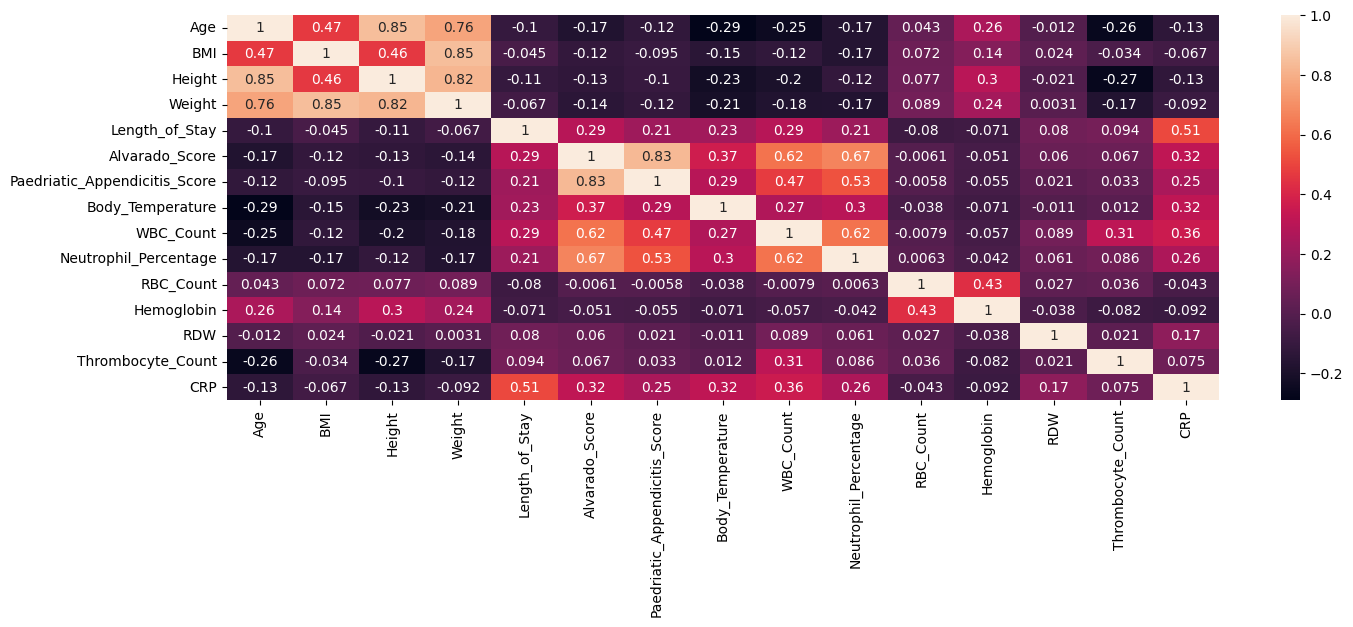

In [30]:
plt.figure(figsize = (16,5))
ax = sns.heatmap(num_corr_matrix, annot=True)     # Sample figsize in inches

En resumen, podemos ver que los datos de edad, BMI, peso y medida están todos correlacionados, esto tiene bastante sentido ya que entre mas grande es una persona más peso tiene, simplemente por el hecho de crecer, pero es bueno poder observar esto en nuestros datos.

Para el resto podemos ver que el que más correlación tiene parece ser que la puntación de Alvarado y la puntuación de apendicitis están bastante relacionadas, esto tiene sentido ya que esto se utiliza para determinar si existe apendicitis en el paciente o no.

Ya los restos de datos son correlaciones con la cantidad de neutrófilos, conteo de glóbulos blancos e inclusive podemos ver que el tiempo de estancia de los pacientes esta vinculada con la cantidad de proteína C reactiva contenida en los pacientes.


Lo siguiente será observar los datos mediante el uso de gráficas, las primeras serán observar los datos numéricos y sus valores atípicos usando graficas de cajas o bigotes

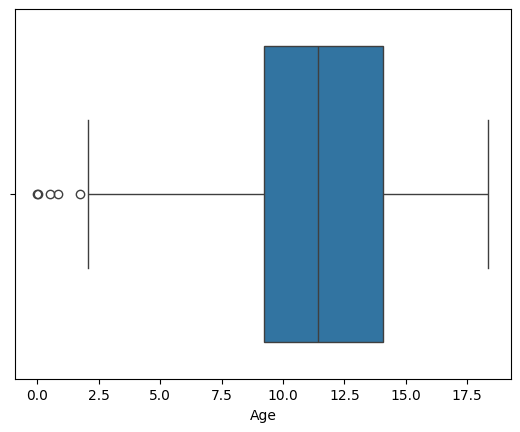

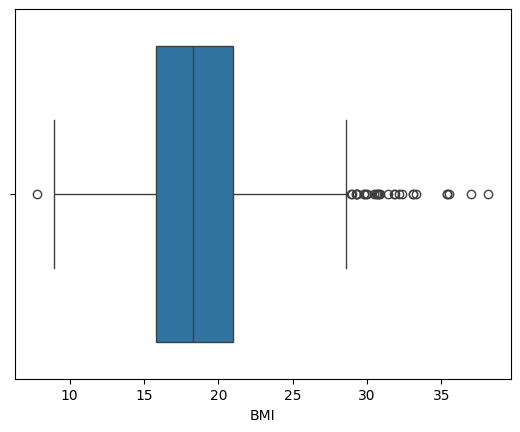

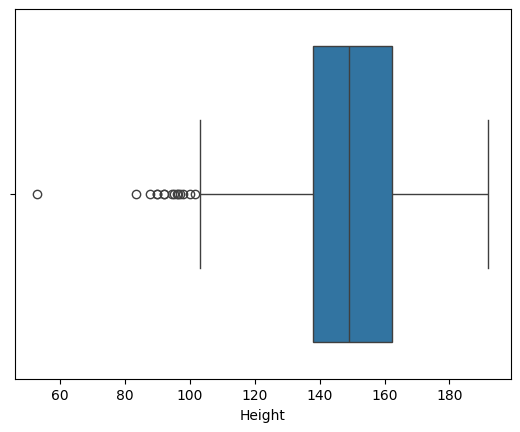

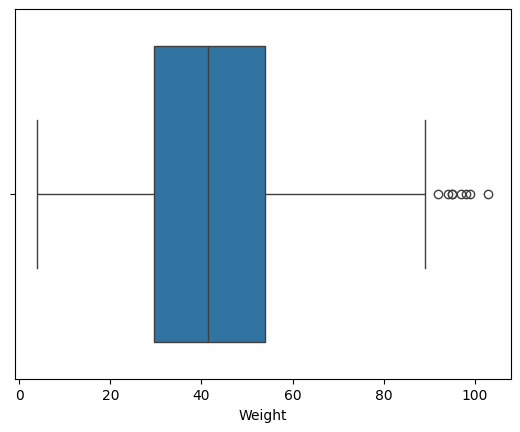

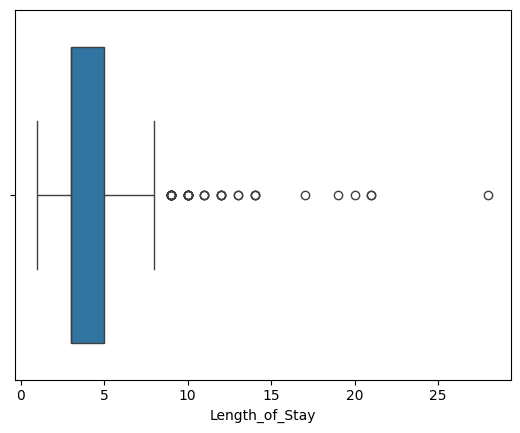

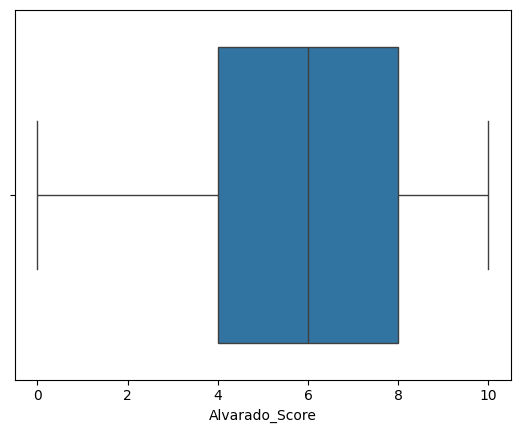

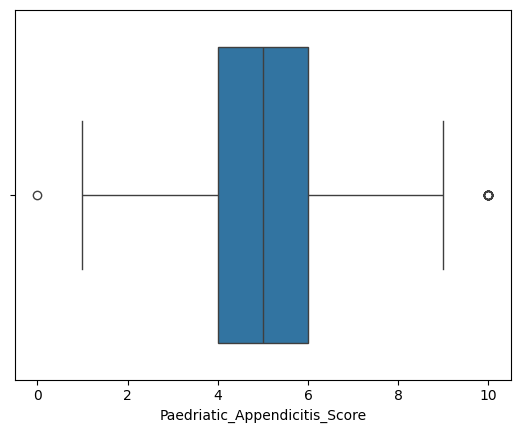

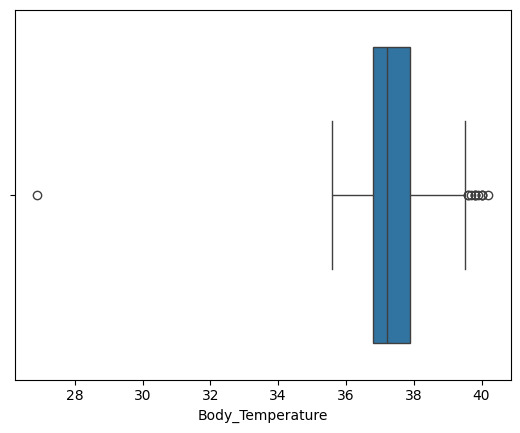

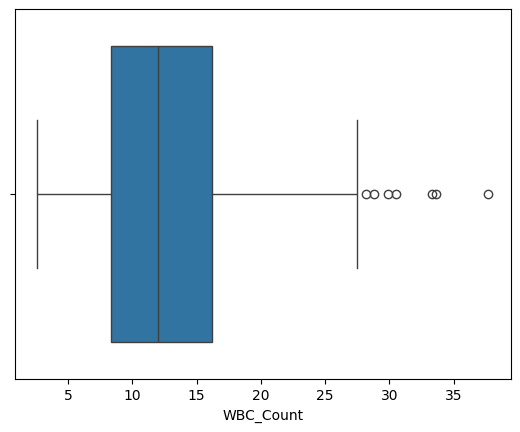

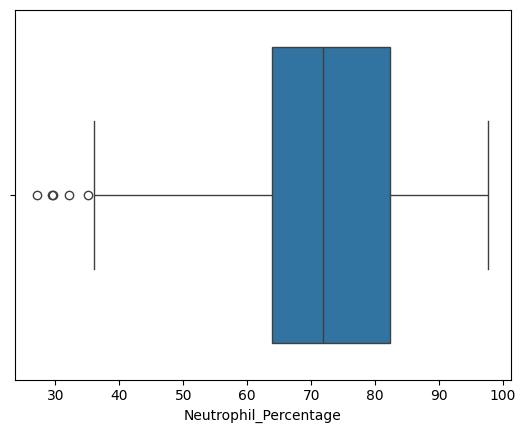

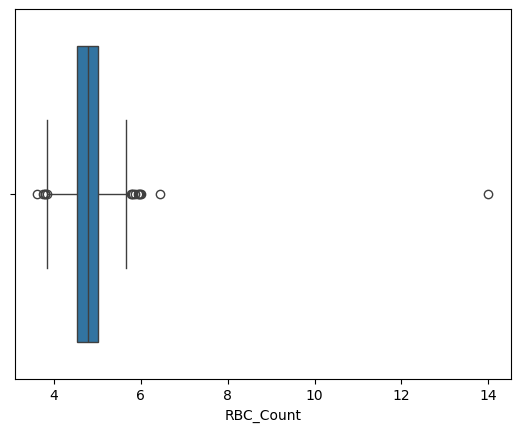

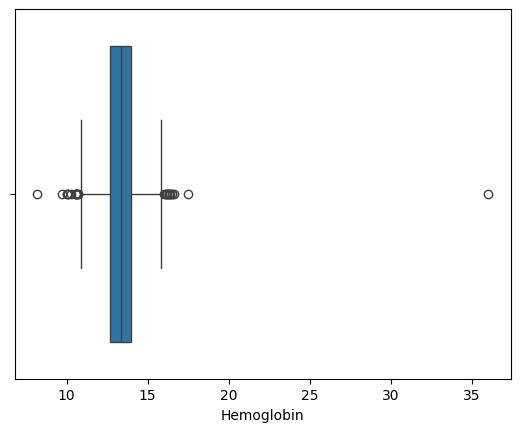

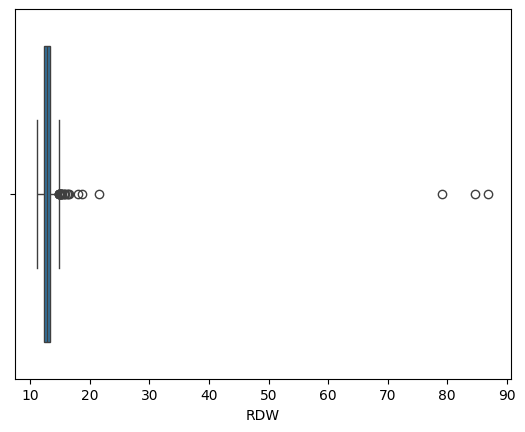

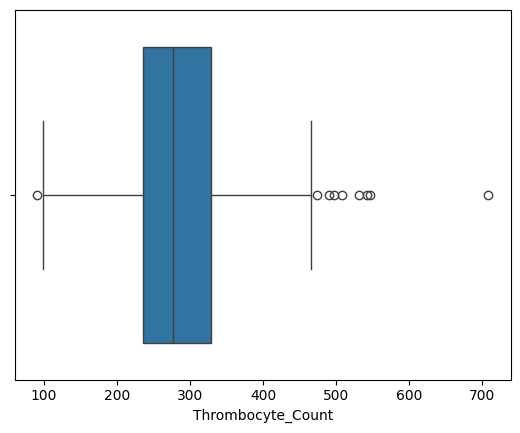

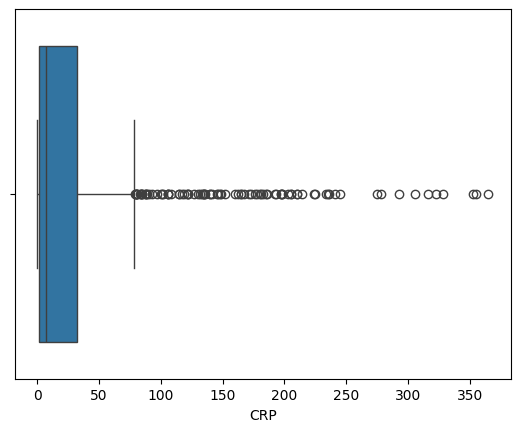

In [31]:
for i in numerical_features:
    plt.figure()
    sns.boxplot(x=numerical_features[i])

En general la mayoría de los datos parecen estar dentro de un rango razonable, pero hay algunos que si se considerarían atípicos, dentro de los datos de temperatura corporal, RBC, Hemoglobina y RDW se estarán quitando los datos que se observan como atípicos.

Valores que se consideraron outliers

In [32]:
numerical_features.loc[numerical_features["Body_Temperature"] < 28 ]

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Body_Temperature,WBC_Count,Neutrophil_Percentage,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,CRP
221,17.49,17.72,165.0,48.25,3.0,2.0,2.0,26.9,5.8,62.9,4.36,13.8,12.4,205.0,0.0


In [33]:
numerical_features.loc[numerical_features["RBC_Count"] > 12]

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Body_Temperature,WBC_Count,Neutrophil_Percentage,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,CRP
203,8.09,16.5,128.0,27.0,3.0,7.0,6.0,36.8,14.0,86.1,14.0,14.7,13.6,289.0,10.0


In [34]:
numerical_features.loc[numerical_features["Hemoglobin"] > 30]

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Body_Temperature,WBC_Count,Neutrophil_Percentage,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,CRP
564,7.53,18.907012,148.01746,23.3,7.0,7.0,5.0,37.8,15.9,82.8,4.37,36.0,12.2,366.0,15.0


In [35]:
numerical_features.loc[numerical_features["RDW"] > 70]

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Body_Temperature,WBC_Count,Neutrophil_Percentage,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,CRP
541,9.25,15.23,138.0,29.0,8.0,7.0,5.0,37.5,23.8,79.2,4.91,13.7,79.2,353.0,353.0
557,15.38,23.41,163.0,62.2,8.0,9.0,6.0,37.3,19.4,84.6,4.56,13.6,84.6,221.0,146.0
586,11.37,20.93,145.0,44.0,5.0,7.0,6.0,36.4,15.2,86.9,4.90,13.6,86.9,281.0,19.0


In [36]:
numerical_features.drop(labels=[221, 203, 564, 541, 557, 586], axis="index", inplace=True)

In [37]:
categorical_features.drop(labels=[221, 203, 564, 541, 557, 586], axis="index", inplace=True)

In [38]:
targets_reduced_data.drop(labels=[221, 203, 564, 541, 557, 586], axis="index", inplace=True)

In [39]:
numerical_features.reset_index(drop=True)

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Body_Temperature,WBC_Count,Neutrophil_Percentage,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,CRP
0,12.68,16.90,148.0,37.0,3.0,4.0,3.0,37.0,7.7,68.2,5.27,14.8,12.2,254.0,0.0
1,14.10,31.90,147.0,69.5,2.0,5.0,4.0,36.9,8.1,64.8,5.26,15.7,12.7,151.0,3.0
2,14.14,23.30,163.0,62.0,4.0,5.0,3.0,36.6,13.2,74.8,3.98,11.4,12.2,300.0,3.0
3,16.37,20.60,165.0,56.0,3.0,7.0,6.0,36.0,11.4,63.0,4.64,13.6,13.2,258.0,0.0
4,11.08,16.90,163.0,45.0,3.0,5.0,6.0,36.9,8.1,44.0,4.44,12.6,13.6,311.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,12.41,25.25,166.5,70.0,4.0,8.0,7.0,39.4,11.4,76.6,4.95,13.7,13.4,243.0,71.0
772,17.09,20.43,158.0,51.0,6.0,5.0,3.0,37.8,17.4,89.2,4.52,13.1,12.8,310.0,245.0
773,14.99,19.91,152.0,46.0,4.0,5.0,3.0,37.3,14.6,68.5,4.49,12.7,12.8,328.0,2.0
774,7.20,14.30,129.3,23.9,5.0,9.0,8.0,37.5,17.8,77.0,4.97,14.3,12.7,345.0,8.0


In [40]:
categorical_features.reset_index(drop=True)

,Sex,Appendix_on_US,Migratory_Pain,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Coughing_Pain,Nausea,Loss_of_Appetite,Neutrophilia,Dysuria,Stool,Peritonitis,Psoas_Sign,US_Performed,Free_Fluids
0,female,yes,no,yes,yes,no,no,yes,no,no,normal,no,yes,yes,no
1,male,no,yes,yes,yes,no,no,yes,no,yes,normal,no,yes,yes,no
2,female,no,no,yes,yes,no,no,no,no,no,constipation,no,yes,yes,no
3,female,no,yes,yes,no,no,yes,yes,no,yes,normal,no,yes,yes,no
4,female,yes,no,yes,yes,yes,yes,yes,no,no,constipation,no,yes,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,female,yes,yes,yes,no,no,no,yes,yes,no,diarrhea,local,yes,yes,no
772,female,no,no,no,no,no,no,yes,yes,no,normal,local,no,yes,no
773,female,no,no,yes,no,no,no,no,no,yes,normal,no,no,yes,yes
774,male,yes,yes,yes,no,yes,yes,no,yes,no,normal,local,no,yes,yes


In [41]:
targets_reduced_data.reset_index(drop=True)

,Management,Severity,Diagnosis
0,conservative,uncomplicated,appendicitis
1,conservative,uncomplicated,no appendicitis
2,conservative,uncomplicated,no appendicitis
3,conservative,uncomplicated,no appendicitis
4,conservative,uncomplicated,appendicitis
...,...,...,...
771,primary surgical,uncomplicated,appendicitis
772,secondary surgical,complicated,appendicitis
773,primary surgical,uncomplicated,appendicitis
774,primary surgical,uncomplicated,appendicitis


Ahora las siguientes graficas serán para poder observar el comportamiento de los datos, hice un énfasis en mostrar los datos que están correlacionados que encontramos anteriormente

Valores numéricos

<Axes: xlabel='Age', ylabel='BMI'>

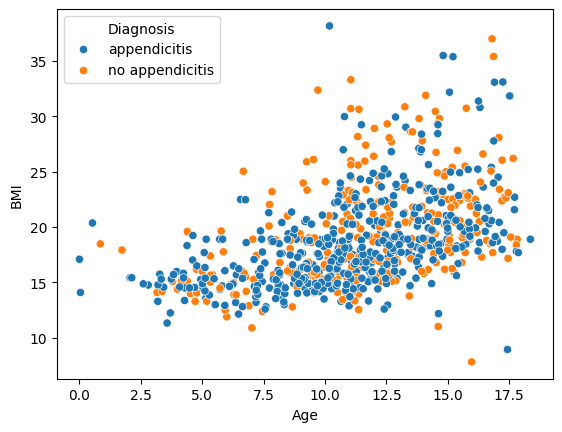

In [42]:
sns.scatterplot(data=numerical_features, x="Age", y="BMI", hue=targets_reduced_data['Diagnosis'])

<Axes: xlabel='Age', ylabel='Height'>

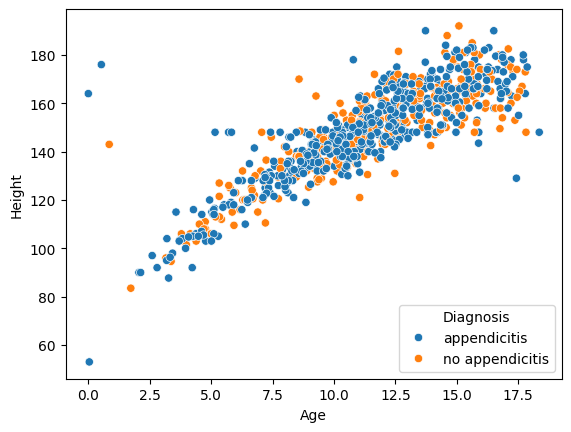

In [43]:
sns.scatterplot(data=numerical_features, x="Age", y="Height", hue=targets_reduced_data['Diagnosis'])

<Axes: xlabel='Age', ylabel='Weight'>

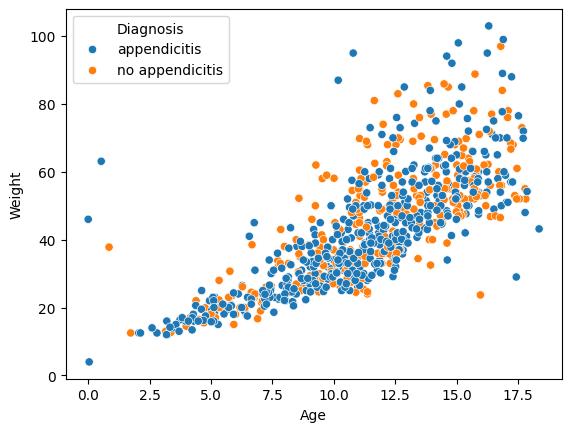

In [44]:
sns.scatterplot(data=numerical_features, x="Age", y="Weight", hue=targets_reduced_data['Diagnosis'])

<Axes: xlabel='Alvarado_Score', ylabel='count'>

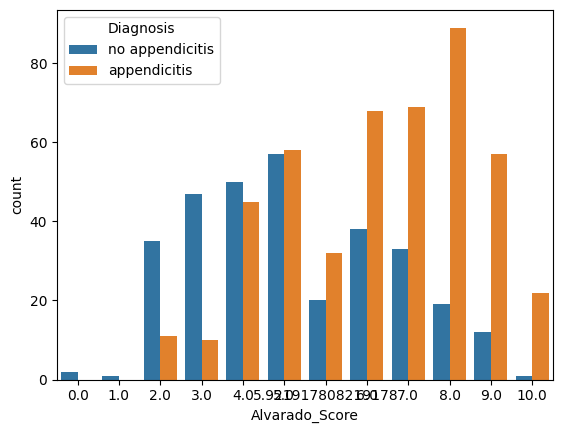

In [45]:
sns.countplot(numerical_features, x="Alvarado_Score", hue=targets_reduced_data['Diagnosis'])

<Axes: xlabel='Age', ylabel='Alvarado_Score'>

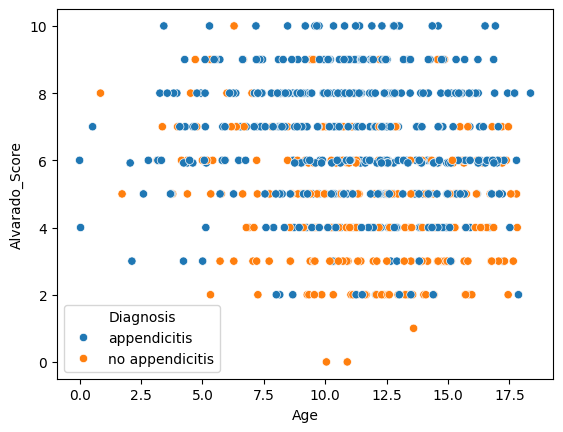

In [46]:
sns.scatterplot(data=numerical_features, x="Age", y="Alvarado_Score", hue=targets_reduced_data['Diagnosis'])

<Axes: xlabel='Body_Temperature', ylabel='Alvarado_Score'>

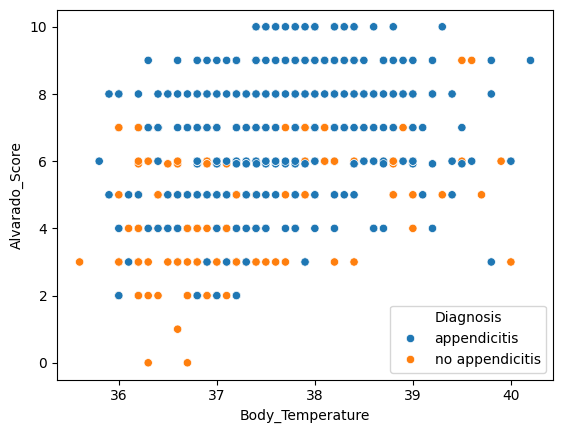

In [47]:
sns.scatterplot(data=numerical_features, x="Body_Temperature", y="Alvarado_Score", hue=targets_reduced_data['Diagnosis'])

<Axes: xlabel='Body_Temperature', ylabel='Paedriatic_Appendicitis_Score'>

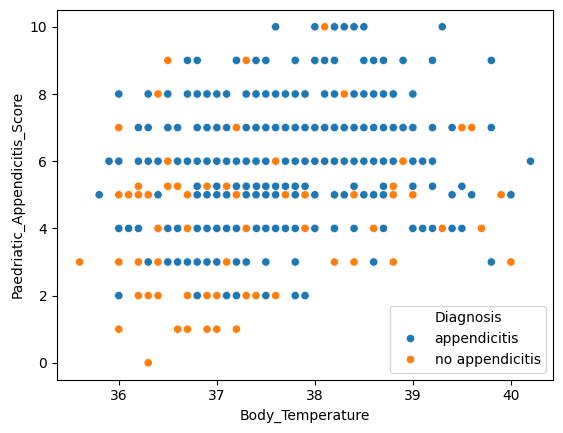

In [48]:
sns.scatterplot(data=numerical_features, x="Body_Temperature", y="Paedriatic_Appendicitis_Score", hue=targets_reduced_data['Diagnosis'])

<Axes: xlabel='Neutrophil_Percentage', ylabel='Alvarado_Score'>

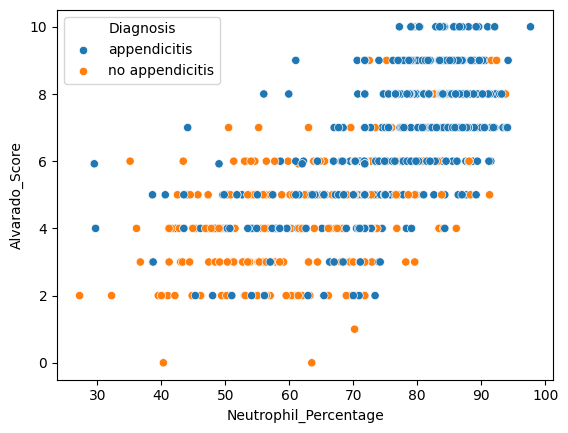

In [49]:
sns.scatterplot(data=numerical_features, x="Neutrophil_Percentage", y="Alvarado_Score", hue=targets_reduced_data['Diagnosis'])

<Axes: xlabel='Alvarado_Score', ylabel='Paedriatic_Appendicitis_Score'>

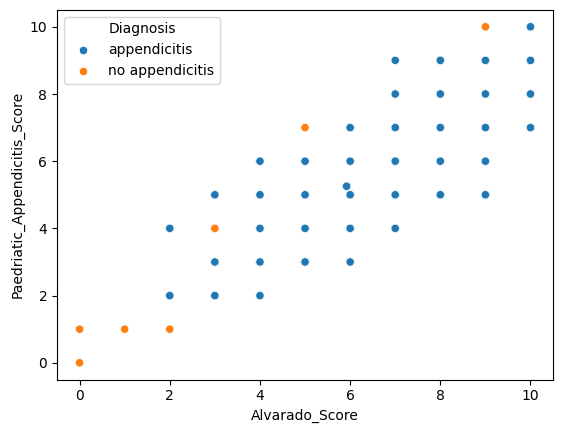

In [50]:
sns.scatterplot(data=numerical_features, x="Alvarado_Score", y="Paedriatic_Appendicitis_Score", hue=targets_reduced_data['Diagnosis'])

<Axes: xlabel='Length_of_Stay', ylabel='CRP'>

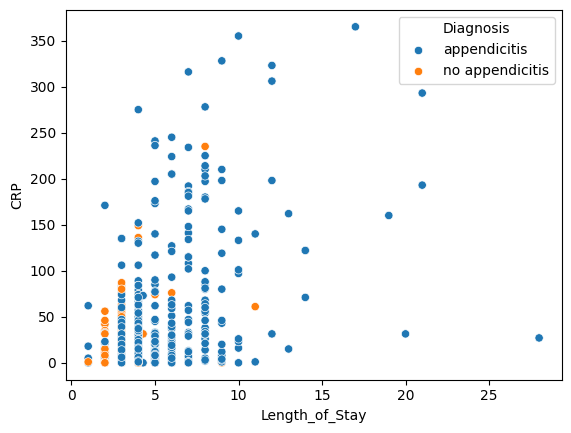

In [51]:
sns.scatterplot(data=numerical_features, x="Length_of_Stay", y="CRP", hue=targets_reduced_data['Diagnosis'])

En general podemos observar que si existe correlación con los datos que mencionamos anteriormente lo que me llama más la atención es que el porcentaje de neutrófilos si parece impactar con el puntaje de Alvarado, estos también están relacionados a el puntaje de apendicitis, aunque no muestra mucho sobre la edad la relación que tengan con su peso o la edad en cuanto al puntaje de apendicitis.

Valores categóricos

<Axes: xlabel='Sex', ylabel='count'>

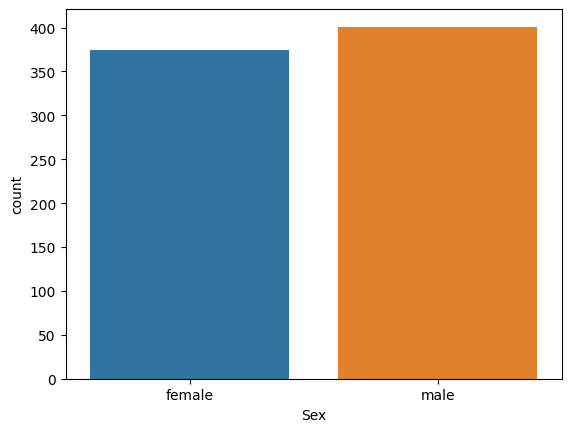

In [52]:
sns.countplot(categorical_features, x="Sex", hue="Sex")

<Axes: xlabel='Sex', ylabel='count'>

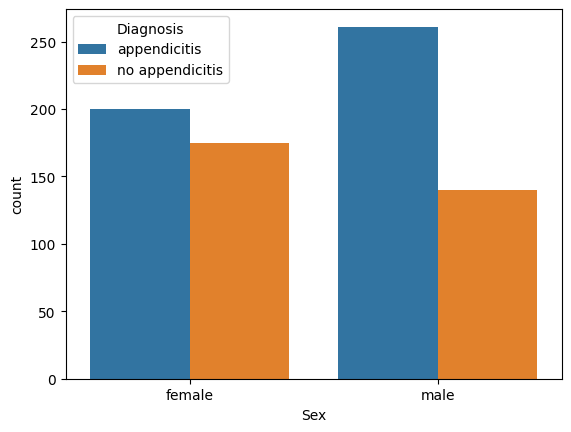

In [53]:
sns.countplot(categorical_features, x="Sex", hue=targets_reduced_data['Diagnosis'])

<Axes: xlabel='Coughing_Pain', ylabel='count'>

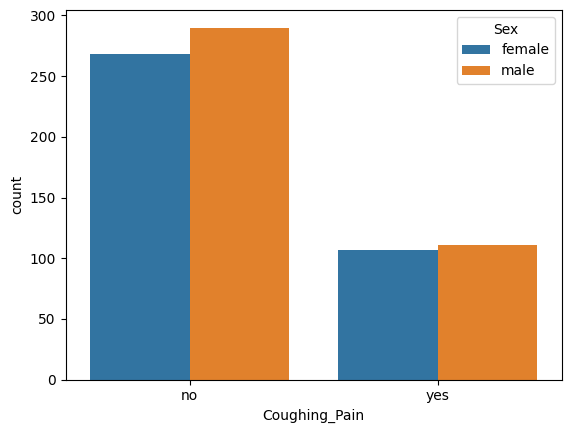

In [54]:
sns.countplot(categorical_features, x="Coughing_Pain", hue="Sex")

<Axes: xlabel='Coughing_Pain', ylabel='count'>

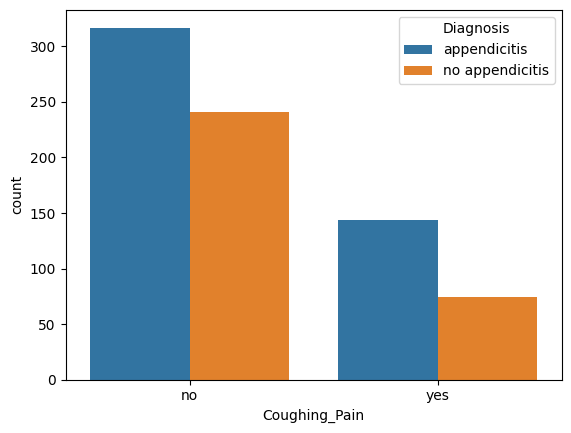

In [55]:
sns.countplot(categorical_features, x="Coughing_Pain", hue=targets_reduced_data['Diagnosis'])

<Axes: xlabel='Migratory_Pain', ylabel='count'>

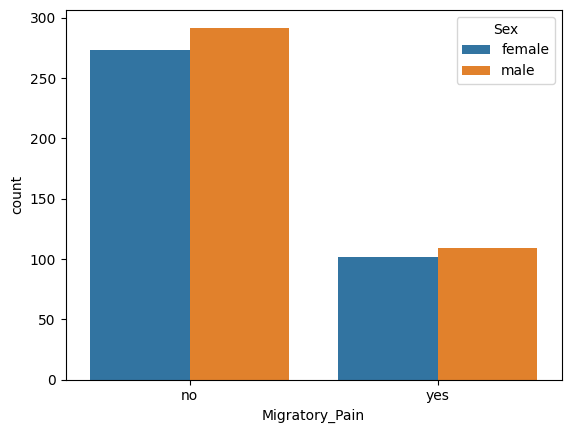

In [56]:
sns.countplot(categorical_features, x="Migratory_Pain", hue="Sex")

<Axes: xlabel='Migratory_Pain', ylabel='count'>

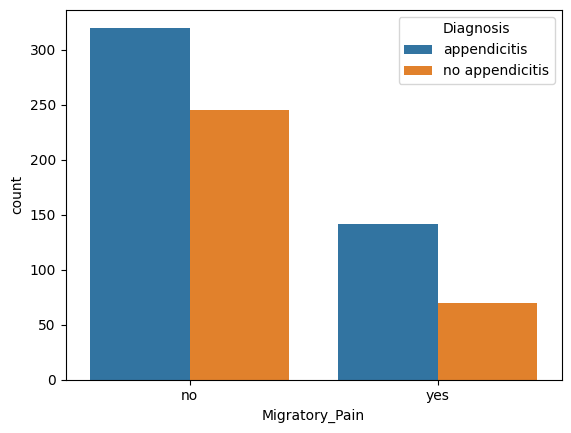

In [57]:
sns.countplot(categorical_features, x="Migratory_Pain", hue=targets_reduced_data['Diagnosis'])

<Axes: xlabel='Nausea', ylabel='count'>

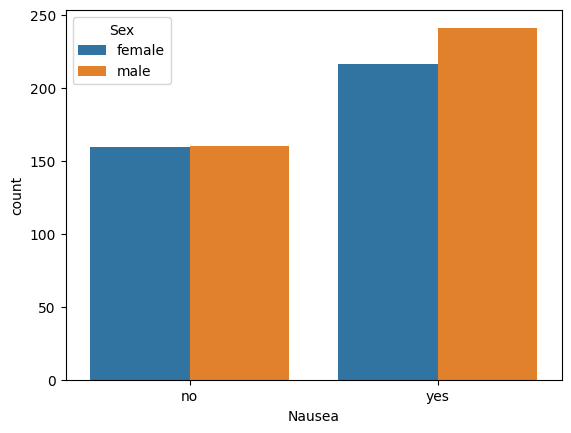

In [58]:
sns.countplot(categorical_features, x="Nausea", hue="Sex")

<Axes: xlabel='Nausea', ylabel='count'>

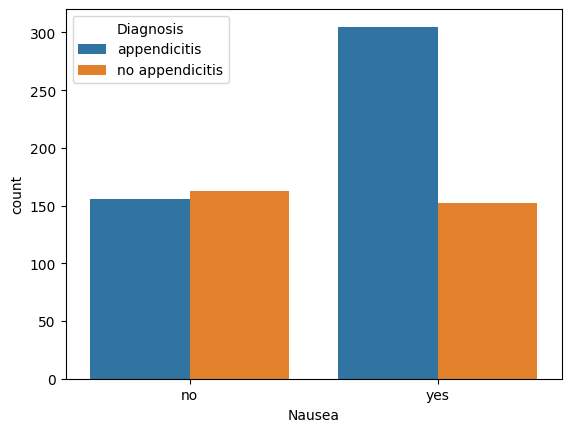

In [59]:
sns.countplot(categorical_features, x="Nausea", hue=targets_reduced_data['Diagnosis'])

<Axes: xlabel='Loss_of_Appetite', ylabel='count'>

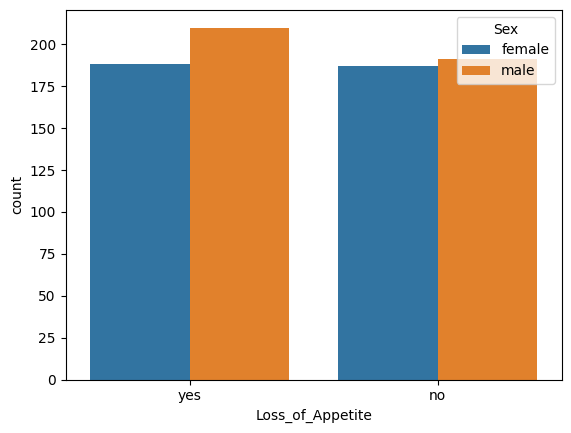

In [60]:
sns.countplot(categorical_features, x="Loss_of_Appetite", hue="Sex")

<Axes: xlabel='Loss_of_Appetite', ylabel='count'>

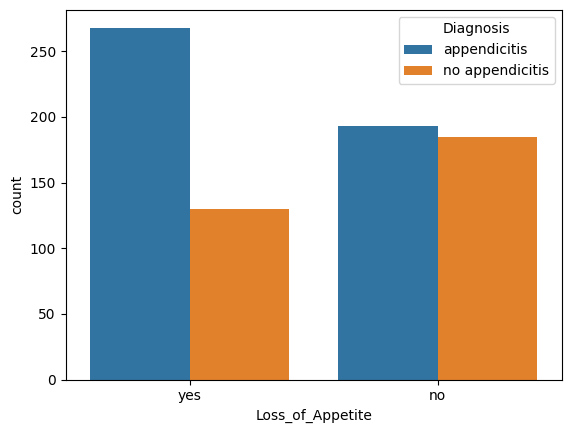

In [61]:
sns.countplot(categorical_features, x="Loss_of_Appetite", hue=targets_reduced_data['Diagnosis'])

<Axes: xlabel='Stool', ylabel='count'>

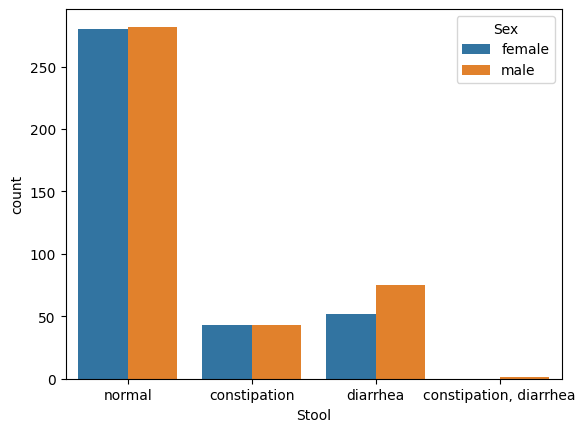

In [62]:
sns.countplot(categorical_features, x="Stool", hue="Sex")

<Axes: xlabel='Stool', ylabel='count'>

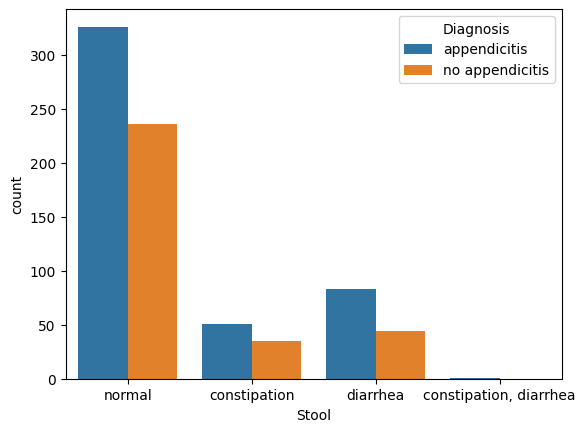

In [63]:
sns.countplot(categorical_features, x="Stool", hue=targets_reduced_data['Diagnosis'])

Hay varias cosas que podemos observar con los valores categóricos la mayoría de estas graficas se enfocó en los síntomas más comunes de apendicitis

Hay más hombres que mujeres en los estudios, la mayoría de los hombres también parece que, si tuvieron apendicitis, la mayoría no tuvo dolores al estornudar en ambos géneros pero la mayoría si fue diagnosticada con apendicitis se puede observar el mismo patrón con el dolor migratorio

Hubo una mayor cantidad de personas que tienen nausea en ambos géneros y mas hombres que mujeres fueron diagnosticados con nauseas, mas hombres que mujeres sintieron perdida de apetito y fueron diagnosticados con apendicitis, finalmente la condición de las heces no parece afectar mucho el diagnostico de apendicitis.


Finalmente, estaremos creando histogramas para observar el conjunto en nuestros valores numéricos

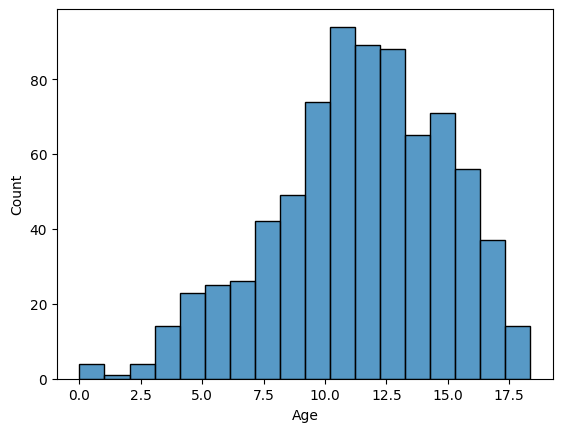

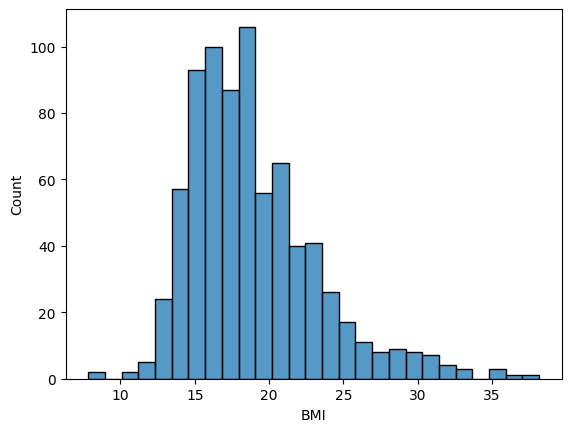

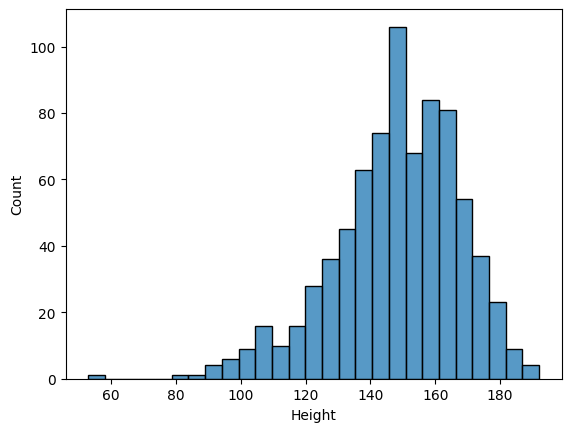

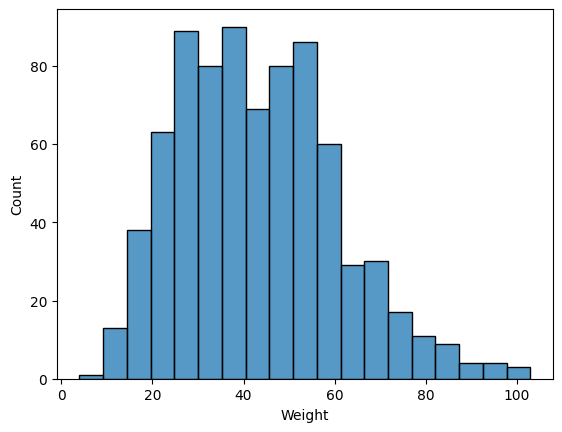

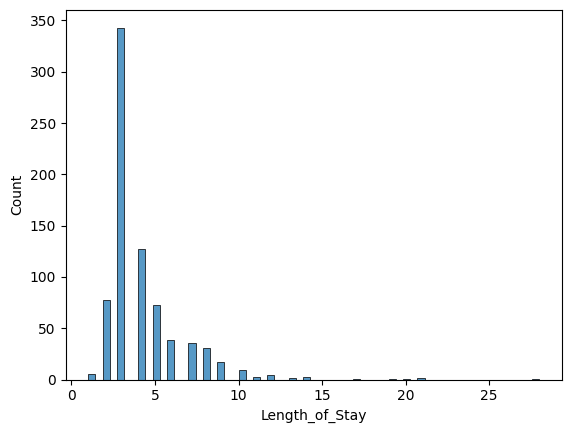

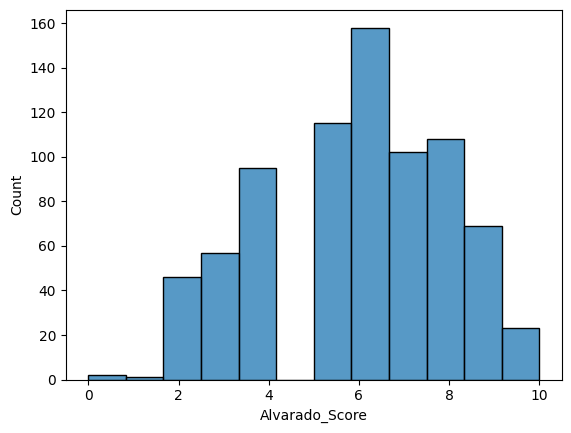

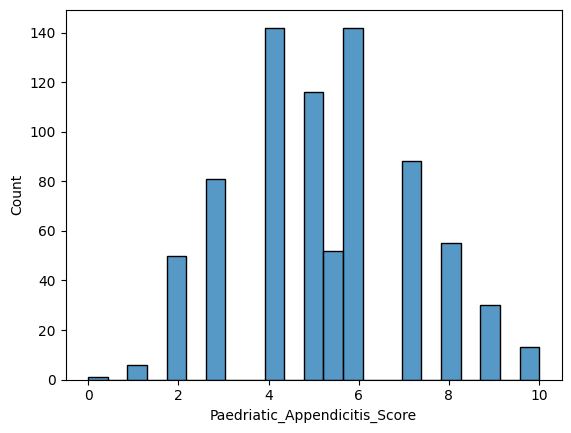

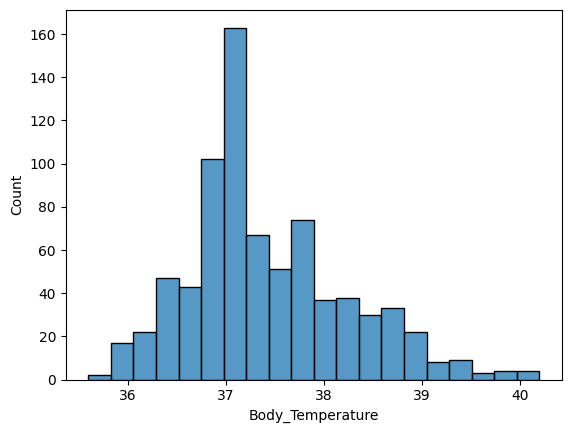

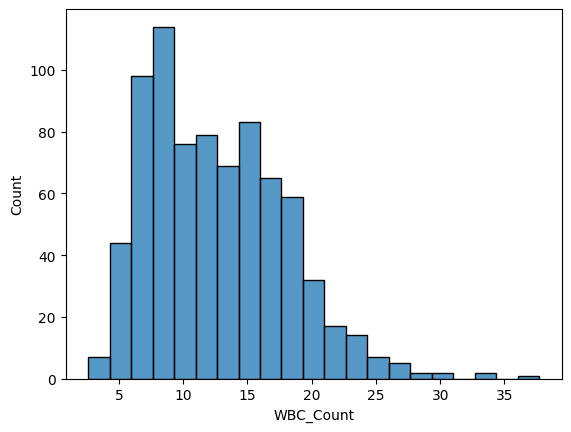

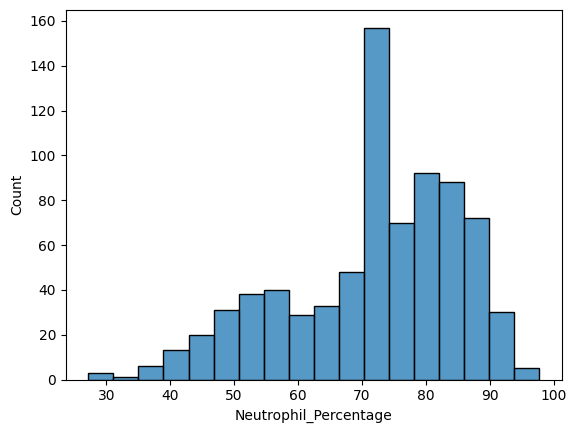

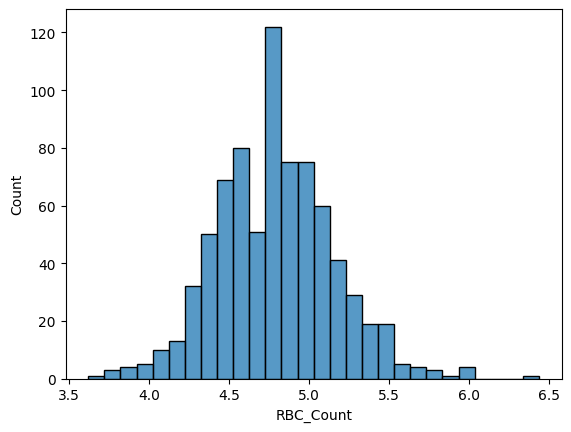

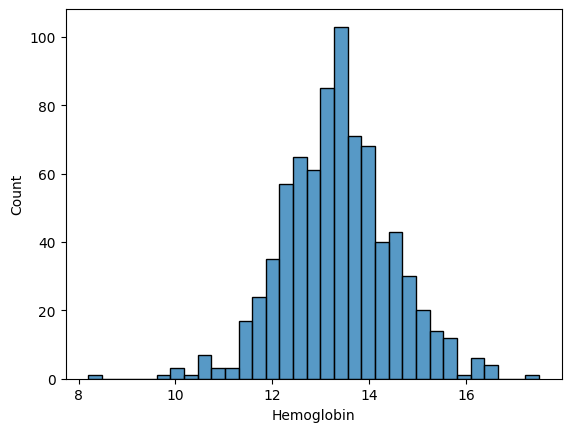

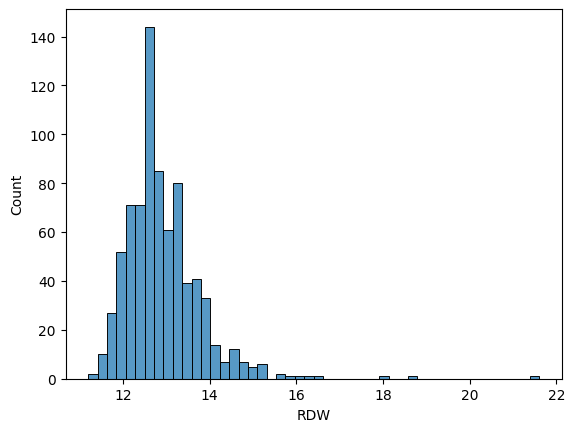

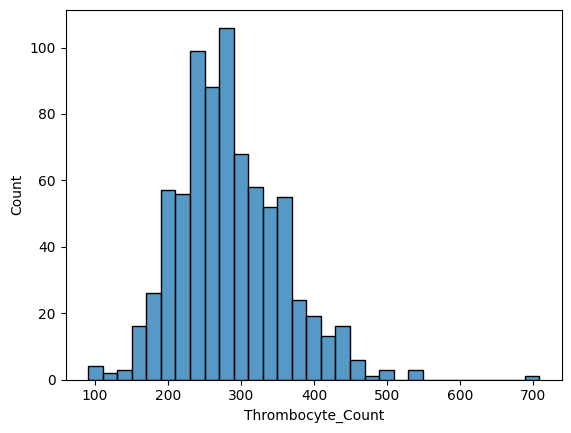

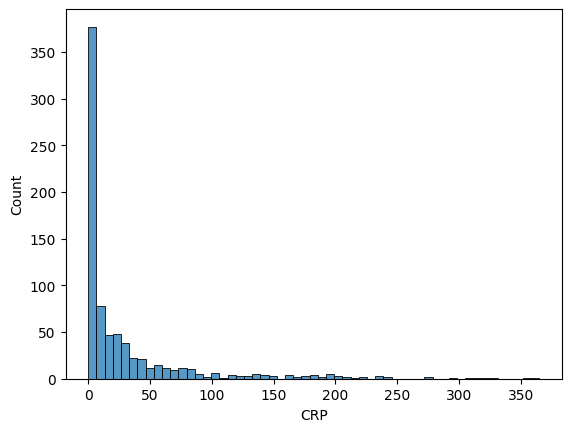

In [64]:
for i in numerical_features:
    plt.figure()
    sns.histplot(numerical_features[i])

Gracias a la reducción de los outliers, en mi opinión se ven mejor la distribución final de nuestro set de datos.

### Determinar la pregunta que deseas abordar con un modelo de aprendizaje automático

En mi resultado de lo que puedo comprender de mi set de datos, lo ideal será crear un modelo enfocado en la clasificación de si un paciente tiene o no apendicitis, aunque se podrían crear otros tipos de modelos con esta información, se podrían comparar con modelos de árboles de decisión, SVM y modelos de ese estilo

También se podrían comprar resultados con mas modelos como redes neuronales y compara cual modelo tiene mejor resultados con la información que tenemos actualmente


### Identificar por qué se necesita una estrategia de MLOps para este data set

MLOps utiliza un conjunto de prácticas para garantizar la confiabilidad del modelo ML (aprendizaje automático).Los ciclos MLOps encapsulan todo el ciclo de vida del modelo de aprendizaje automático, desde la producción de modelos ML hasta su mantenimiento continuo después de la implementación. En otras palabras, MLOps reúne el desarrollo y las operaciones de modelos de aprendizaje automático.

Ahora, la ventaja de implementar la cultura y las operaciones de Machine Learning, es agilizar el desarrollo de modelos, desde la preparación y adquisición de datos y su entrenamiento. Sin mencionar que es más fácil enfocarnos en las necesidades del negocio y monitorear constantemente el modelo para asegurarnos que cumplan con las mismas, en otras palabra agilizamos la creación e implementación continua del modelo como se vea necesario.


### Diseñar la arquitectura del pipeline para esta nueva iniciativa de aprendizaje automático

**•	Complementa la sección "diseño de pipeline" agregando un diagrama donde describas los diferentes pasos de tu proceso. Puedes usar algunas herramientas como draw.io**

Lo primero será convertir nuestros datos categóricos a algo que pueda leer nuestro modelo (categóricos a numéricos) y se concatenara con el resto de los datos, esto nos ayudará a tener el conjunto de features (o nuestra variable X) preparado para el entrenamiento del modelo

**•	En la sección del "diseño de pipeline", prueba implementando el uso de OrdinalEncoder o OneHotEncoder de la librería scikit-learn en lugar de usar la función get_dummies de pandas**

In [65]:
#Se intento hacer una implementacion usando OneHotEncoder pero al concatenarse,
#Se crea una tabla de manera irregular, de momento se estara saltando este paso.
"""
enc = preprocessing.OneHotEncoder()
one_hot_array = enc.fit_transform(categorical_features).toarray()
one_hot_df = pandas.DataFrame(one_hot_array, columns=enc.get_feature_names_out())
one_hot_df.reset_index(drop=True)
"""

'\nenc = preprocessing.OneHotEncoder()\none_hot_array = enc.fit_transform(categorical_features).toarray()\none_hot_df = pandas.DataFrame(one_hot_array, columns=enc.get_feature_names_out())\none_hot_df.reset_index(drop=True)\n'

In [66]:
cat_to_num = pandas.get_dummies(categorical_features)
cat_to_num.reset_index(drop=True)

,Sex_female,Sex_male,Appendix_on_US_no,Appendix_on_US_yes,Migratory_Pain_no,Migratory_Pain_yes,Lower_Right_Abd_Pain_no,Lower_Right_Abd_Pain_yes,Contralateral_Rebound_Tenderness_no,Contralateral_Rebound_Tenderness_yes,...,Stool_normal,Peritonitis_generalized,Peritonitis_local,Peritonitis_no,Psoas_Sign_no,Psoas_Sign_yes,US_Performed_no,US_Performed_yes,Free_Fluids_no,Free_Fluids_yes
0,True,False,False,True,True,False,False,True,False,True,...,True,False,False,True,False,True,False,True,True,False
1,False,True,True,False,False,True,False,True,False,True,...,True,False,False,True,False,True,False,True,True,False
2,True,False,True,False,True,False,False,True,False,True,...,False,False,False,True,False,True,False,True,True,False
3,True,False,True,False,False,True,False,True,True,False,...,True,False,False,True,False,True,False,True,True,False
4,True,False,False,True,True,False,False,True,False,True,...,False,False,False,True,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,True,False,False,True,False,True,False,True,True,False,...,False,False,True,False,False,True,False,True,True,False
772,True,False,True,False,True,False,True,False,True,False,...,True,False,True,False,True,False,False,True,True,False
773,True,False,True,False,True,False,False,True,True,False,...,True,False,False,True,True,False,False,True,False,True
774,False,True,False,True,False,True,False,True,True,False,...,True,False,True,False,True,False,False,True,False,True


In [67]:
#X= pandas.concat([numerical_features, one_hot_df], axis= 1)
X= pandas.concat([numerical_features, cat_to_num], axis= 1)
X

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Body_Temperature,WBC_Count,Neutrophil_Percentage,...,Stool_normal,Peritonitis_generalized,Peritonitis_local,Peritonitis_no,Psoas_Sign_no,Psoas_Sign_yes,US_Performed_no,US_Performed_yes,Free_Fluids_no,Free_Fluids_yes
0,12.68,16.90,148.0,37.0,3.0,4.0,3.0,37.0,7.7,68.2,...,True,False,False,True,False,True,False,True,True,False
1,14.10,31.90,147.0,69.5,2.0,5.0,4.0,36.9,8.1,64.8,...,True,False,False,True,False,True,False,True,True,False
2,14.14,23.30,163.0,62.0,4.0,5.0,3.0,36.6,13.2,74.8,...,False,False,False,True,False,True,False,True,True,False
3,16.37,20.60,165.0,56.0,3.0,7.0,6.0,36.0,11.4,63.0,...,True,False,False,True,False,True,False,True,True,False
4,11.08,16.90,163.0,45.0,3.0,5.0,6.0,36.9,8.1,44.0,...,False,False,False,True,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,12.41,25.25,166.5,70.0,4.0,8.0,7.0,39.4,11.4,76.6,...,False,False,True,False,False,True,False,True,True,False
778,17.09,20.43,158.0,51.0,6.0,5.0,3.0,37.8,17.4,89.2,...,True,False,True,False,True,False,False,True,True,False
779,14.99,19.91,152.0,46.0,4.0,5.0,3.0,37.3,14.6,68.5,...,True,False,False,True,True,False,False,True,False,True
780,7.20,14.30,129.3,23.9,5.0,9.0,8.0,37.5,17.8,77.0,...,True,False,True,False,True,False,False,True,False,True


Al final terminamos con un conjunto de 48 columnas (contando como se separó los datos categóricos ) con 776 columnas

Ahora para nuestro target (valor y), separaremos lo que mas nos interesa, que seria saber el diagnostico del paciente, lo que haremos ahora será separa y dejar solo ese target (para simplificar esta prueba) y cambiar los datos también a algo que pueda leer el modelo.

In [68]:
new_targets = targets_reduced_data.drop(labels= ['Management', 'Severity'], axis= 1)
new_targets

,Diagnosis
0,appendicitis
1,no appendicitis
2,no appendicitis
3,no appendicitis
4,appendicitis
...,...
777,appendicitis
778,appendicitis
779,appendicitis
780,appendicitis


In [69]:
le = preprocessing.LabelEncoder()
le.fit(new_targets)
target_array = le.transform(new_targets)
y = pandas.DataFrame(target_array)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [70]:
y.rename(columns = {0:'Diagnosis'}, inplace = True)
y

,Diagnosis
0,0
1,1
2,1
3,1
4,0
...,...
771,0
772,0
773,0
774,0


De igual manera tenemos 776 filas y una sola columna

En resumen, no tenemos tantos datos, no llegan ni a 1000 filas, lo cual fue buena idea retener lo mas que se pudiera en este modelo.


Lo siguientes será normalizar nuestros datos, principalmente nuestros valores numéricos en el conjunto de X, para mantener todo en un solo margen y ayudar a nuestro modelo a entender el conjunto de datos.

In [71]:
# copy the data
X_copy = X.copy()

# apply normalization techniques
Sc = preprocessing.StandardScaler().fit_transform(X_copy)
X_scaled = pandas.DataFrame(Sc)

# view normalized data
display(X_scaled)

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.378789,-0.465240,-0.000971,-0.357290,-0.496254,-0.921611,-1.190798,-0.512618,-0.927396,-0.261484,...,0.617076,-0.233126,-0.573382,0.653047,-1.526588,1.526588,-0.140396,0.140396,0.811246,-0.811246
1,0.781769,3.010205,-0.052439,1.514055,-0.885970,-0.440966,-0.662818,-0.634778,-0.852415,-0.513734,...,0.617076,-0.233126,-0.573382,0.653047,-1.526588,1.526588,-0.140396,0.140396,0.811246,-0.811246
2,0.793121,1.017617,0.771059,1.082206,-0.106537,-0.440966,-1.190798,-1.001257,0.103588,0.228177,...,-1.620546,-0.233126,-0.573382,0.653047,-1.526588,1.526588,-0.140396,0.140396,0.811246,-0.811246
3,1.425970,0.392037,0.873997,0.736727,-0.496254,0.520323,0.393142,-1.734217,-0.233825,-0.647278,...,0.617076,-0.233126,-0.573382,0.653047,-1.526588,1.526588,-0.140396,0.140396,0.811246,-0.811246
4,-0.075273,-0.465240,0.771059,0.103349,-0.496254,-0.440966,0.393142,-0.634778,-0.852415,-2.056909,...,-1.620546,-0.233126,-0.573382,0.653047,-1.526588,1.526588,-0.140396,0.140396,0.811246,-0.811246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,0.302166,1.469424,0.951200,1.542845,-0.106537,1.000967,0.921122,2.419220,-0.233825,0.361721,...,-1.620546,-0.233126,1.744037,-1.531283,-1.526588,1.526588,-0.140396,0.140396,0.811246,-0.811246
772,1.630298,0.352648,0.513716,0.448828,0.672896,-0.440966,-1.190798,0.464662,0.890884,1.296529,...,0.617076,-0.233126,1.744037,-1.531283,0.655055,-0.655055,-0.140396,0.140396,0.811246,-0.811246
773,1.034341,0.232166,0.204904,0.160928,-0.106537,-0.440966,-1.190798,-0.146138,0.366020,-0.239227,...,0.617076,-0.233126,-0.573382,0.653047,0.655055,-0.655055,-0.140396,0.140396,-1.232672,1.232672
774,-1.176373,-1.067650,-0.963435,-1.111586,0.283179,1.481612,1.449102,0.098182,0.965865,0.391397,...,0.617076,-0.233126,1.744037,-1.531283,0.655055,-0.655055,-0.140396,0.140396,-1.232672,1.232672


Ahora que ya tenemos nuestros datos de X y y, separaremos los datos para entrenamiento y pruebas, usaremos la clase de train_test_split dividendo los datos con el porcentaje por defecto de 25% (85% entrenamiento y 25% pruebas)

In [72]:
# Splitting the Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, shuffle=True)

In [73]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, sep='\n')

(582, 48)
(194, 48)
(582, 1)
(194, 1)


### Crear un modelo base para abordar tareas de predicción (clasificación, regresión, etc.) relacionadas con la pregunta. Este modelo no necesita una alta precisión, recall o puntuación F1; el objetivo es crear un modelo rápido para iteración.

Finalmente, estaremos creando un modelo usando nuestros datos ya separados, empezaremos usando un modelo de regresión lineal simple y ver como se comporta nuestros datos

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
#Modifying the y value to be a 1d array
y_train.values.ravel()

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

Llamamos en la regresión logística, entrenamos usando nuestro set de entrenamiento y obtenemos la predicción de nuestro target

In [76]:
# Instantiating LogisticRegression() Model
lr = LogisticRegression()

# Training/Fitting the Model
lr.fit(X_train, y_train.values.ravel())

# Making Predictions
lr.predict(X_test)
y_pred = lr.predict(X_test)

En esta sección observaremos el desempeño del modelo en general

In [77]:
print(lr.score(X_test, y_test))

0.8247422680412371


In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report

In [79]:
# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.17525773195876287
Mean Squared Error: 0.17525773195876287
Mean Root Squared Error: 0.41863794854117425


In [80]:
accuracy = accuracy_score(y_test, y_pred)
print(f"The model's accuracy is: {accuracy*100}%\n")
print(classification_report(y_test, y_pred))

The model's accuracy is: 82.4742268041237%

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       108
           1       0.82      0.77      0.80        86

    accuracy                           0.82       194
   macro avg       0.82      0.82      0.82       194
weighted avg       0.82      0.82      0.82       194



El modelo al final tuvo una precisión de alrededor del 81%, igualmente el resto de las métricas están alrededor del 79 a 82. Lo cual para ser un modelo sencillo tiene buenas métricas.

### Configurar la estructura correcta del modelo con la idea de dejarlo listo para el despliegue.

En base a los últimos módulos del curso tomado, la idea ahora será separar el modelo usando colab y crear archivos de tipo .py para prepararlo para su despliegue y así asegurarnos que se pueda tener mejor control de su versionamiento.

Estos cambios se prepararán para la 3era entrega y posiblemente se use colab solo para documentar.

Los archivos se estarán distribuyendo de la siguiente manera:

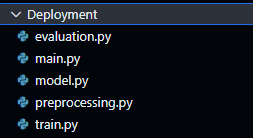

La idea seria separar todos los pasos de la creación del modelo que hice anteriormente:


*   El pre-procesamiento de datos se estará separando en su propia sección.
*   De igual manera se tendrá el modelo en si y posiblemente sus hiper-parametros separados.
*   Los siguientes pasos a separa serán el entrenamiento y su evaluación.
*   Todo esto se estaría llamando dentro de un archivo principal (main)

Esto también se puede complementar al crearse o usarse programas que nos ayuden con le versionamiento por ejemplo el uso de Git, Dvc y archivos tipo yaml.

El cual se estaría contemplando para las siguientes entregas.


### Conclusiones

Se pudo realizar un modelo de clasificación simple, con lo que tengo actualmente hay varias cosas que se pueden hacer para comparar diferentes resultados y también quería mencionar un par de observaciones.

En los datos hay uno que otro que me gustaría incorporar y ver como reacciona el modelo, estos se eliminaron porque pasaron del 20% de datos nulos, pero una de las columnas que se eliminaron fue el diámetro del apéndice, siento que puede ser importante mantenerla y ver como reacciona el modelo, otra cosa que se puede hacer con los datos es cambiar la imputación de datos y ver si hay algún cambio significativo en el modelo (por ejemplo, usar la moda en vez de media).

Para el pipeline, se podría utilizar otro tipo de normalización o métodos, así poder observar hay algún cambio significativo, igual por experimentar también se podría cambiar y ver si hay algún cambio usando solo datos numéricos o cambiando la función para cambiar datos categóricos y numéricos.

Como se mención anteriormente, hay varios modelos que se pueden probar, lo ideal seria tener varias versiones de estos modelos, tanto con los cambios que acabo de mencionar y otros modelos y así poder comparar cual modelo es el que mejor reacciona a nuestros datos.
De igual manera se podría probar el modelo y probar sus predicciones con algunos ejemplos que no existan en el set de datos.

Para la segunda entrega quiero mencionar un par de cambios, fuera de llegar hasta el punto 6, se realizaron algunos de los cambios que se pidieron mejorar, lamentablemente no todos se pudieron implementar ya que causaban problemas o no me quedaba 100% claro.
La idea seria poder terminar esos y futuras sugerencias, ya considerando también mis observaciones anteriores, entre ellas refactorizar a distintos archivos, probar mas opciones en el análisis de datos y probar distintos modelos para ver que resultados tenemos y se acerca mas a lo que queremos resolver o podríamos decir que es el problema de negocio que estamos requiriendo.


### Referencias

https://archive.ics.uci.edu/dataset/938/regensburg+pediatric+appendicitis

https://zenodo.org/records/7669442